### 第0回課題

In [2]:
def fibonacci(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    else:
        return fibonacci(x - 1) + fibonacci(x - 2)

In [3]:
for i in range(20):
    print(fibonacci(i), end=", ")

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 

### 第1回課題

In [4]:
import numpy as np
from sympy import *
init_printing()

A = Matrix([
    [2,1,0],
    [1,-1,2],
    [-1,0,-1]
])
A

⎡2   1   0 ⎤
⎢          ⎥
⎢1   -1  2 ⎥
⎢          ⎥
⎣-1  0   -1⎦

In [5]:
# 余因子
A.adjugate()

⎡1   1   2 ⎤
⎢          ⎥
⎢-1  -2  -4⎥
⎢          ⎥
⎣-1  -1  -3⎦

In [6]:
# 行列式
A.det()

In [7]:
# 逆行列
A.inv()

⎡1   1   2 ⎤
⎢          ⎥
⎢-1  -2  -4⎥
⎢          ⎥
⎣-1  -1  -3⎦

### 第2回課題

In [8]:
import pandas as pd

attri_data2 = {'ID':['100','101','102','105','107','109','111','112'],
               'Math':[50,43,33,76,98, 68,72,60],
               'English':[90,30,20,50,30,66,62,63],
               'Sex':['M','F','F','M','M','F','F','M']}
attri_df = pd.DataFrame(attri_data2)
attri_df.head(8)

,ID,Math,English,Sex
0,100,50,90,M
1,101,43,30,F
2,102,33,20,F
3,105,76,50,M
4,107,98,30,M
5,109,68,66,F
6,111,72,62,F
7,112,60,63,M


In [9]:
table_English=pd.DataFrame({'合格':[0, 0], '不合格':[0,0]},index=['女','男'])
table_English

,合格,不合格
女,0,0
男,0,0


In [10]:
attri_df.iloc[0, :]

ID         100
Math        50
English     90
Sex          M
Name: 0, dtype: object

In [11]:
len(attri_df)
for i in range(len(attri_df)):
    if attri_df.iloc[i, :]['English'] >= 50:
        if attri_df.iloc[i, :]['Sex'] == 'F':
            table_English.iloc[0,0] += 1
        else:
            table_English.iloc[1,0] += 1
    else:
        if attri_df.iloc[i, :]['Sex'] == 'F':
            table_English.iloc[0,1] += 1
        else:
            table_English.iloc[1,1] += 1

In [12]:
table_English

,合格,不合格
女,2,2
男,3,1


In [13]:
table_Math=pd.DataFrame({'合格':[0, 0], '不合格':[0,0]},index=['女','男'])
table_Math

,合格,不合格
女,0,0
男,0,0


In [14]:
len(attri_df)
for i in range(len(attri_df)):
    if attri_df.iloc[i, :]['Math'] >= 50:
        if attri_df.iloc[i, :]['Sex'] == 'F':
            table_Math.iloc[0,0] += 1
        else:
            table_Math.iloc[1,0] += 1
    else:
        if attri_df.iloc[i, :]['Sex'] == 'F':
            table_Math.iloc[0,1] += 1
        else:
            table_Math.iloc[1,1] += 1

In [15]:
table_Math

,合格,不合格
女,2,2
男,4,0


In [16]:
from scipy import stats
data= table_Math.values.tolist()

統計量,p,自由度,期待度数 = stats.chi2_contingency(data)

print ("統計量 " ,統計量)
print ("p値 " ,p)
print ("自由度 " ,自由度)

print("有意水準５％とする。")

print("帰無仮説は棄却されず有意差はない")

統計量  0.6666666666666666
p値  0.4142161782425251
自由度  1
有意水準５％とする。
帰無仮説は棄却されず有意差はない


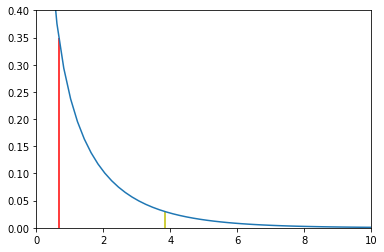

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
#　0から5まで0.1刻み
x = np.linspace(0, 10, 50) #np.arange(0, 5, 0.1)に同じ 

# グラフの輪郭を揃える
plt.xlim(0, 10)
plt.ylim(0, .4)


#自由度１のχ二乗分布グラフを描く
plt.plot(x, stats.chi2.pdf(x, 自由度))

plt.vlines(3.84 ,0,0.03,color="y")
plt.vlines(統計量,0,0.35,color="r");

### 第3回課題

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

data = load_iris()
X=data.data
y=data.target
x_train, x_test, y_train, y_test = train_test_split(X,y) 

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
    {'n_neighbors': list(range(3,11))}
    ]

grid_search = GridSearchCV(KNeighborsClassifier(),  tuned_parameters,cv=3)
grid_search.fit(x_train, y_train)
gs_result = pd.DataFrame.from_dict(grid_search.cv_results_)
gs_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.005774,0.007688,0.002951,0.001347,3,{'n_neighbors': 3},0.921053,0.972973,0.972973,0.955357,0.024583,1,0.986486,0.946667,0.946667,0.959940,0.018771
1,0.000289,0.000012,0.001389,0.000024,4,{'n_neighbors': 4},0.894737,0.972973,0.918919,0.928571,0.032718,5,1.000000,0.946667,0.946667,0.964444,0.025142
2,0.000281,0.000002,0.001382,0.000024,5,{'n_neighbors': 5},0.921053,1.000000,0.918919,0.946429,0.037637,2,1.000000,0.933333,0.973333,0.968889,0.027397
3,0.000276,0.000001,0.001393,0.000041,6,{'n_neighbors': 6},0.894737,0.972973,0.891892,0.919643,0.037476,6,1.000000,0.946667,0.973333,0.973333,0.021773
4,0.000277,0.000002,0.001392,0.000023,7,{'n_neighbors': 7},0.921053,0.972973,0.864865,0.919643,0.043949,6,1.000000,0.946667,0.960000,0.968889,0.022662
5,0.000279,0.000003,0.001380,0.000013,8,{'n_neighbors': 8},0.894737,0.972973,0.891892,0.919643,0.037476,6,1.000000,0.920000,0.946667,0.955556,0.033259
6,0.000274,0.000019,0.001297,0.000017,9,{'n_neighbors': 9},0.921053,1.000000,0.918919,0.946429,0.037637,2,0.986486,0.933333,0.960000,0.959940,0.021700
7,0.000260,0.000002,0.001325,0.000024,10,{'n_neighbors': 10},0.921053,1.000000,0.918919,0.946429,0.037637,2,1.000000,0.906667,0.933333,0.946667,0.039252


In [21]:
best=grid_search.best_estimator_

In [22]:
from sklearn.metrics import confusion_matrix

pred = best.predict(x_test)
confusion_matrix(y_test, pred)

array([[17,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]])

In [23]:
best.n_neighbors

In [24]:
print('最適なkの値:{}'.format(best.n_neighbors))

最適なkの値:3
